# Cross Validation

In [1]:
import numpy as np
from sklearn import datasets as skd
from sklearn.model_selection import KFold

In [2]:
X,y = skd.make_classification(n_samples=10000, n_features=2, n_redundant=0, random_state=4)

In [3]:
kfold=KFold(10, True, 42)

In [6]:
for train,test in kfold.split(X):
    print('train are ', X[train])
    print('test are ', X[test])
    model().fit(X[train],y[train])
    list_of_accuracies.append(accuracy_score(y[test],model.predict(X[test])))
print(list_of_accuracies.mean())

train are  [[-0.81105575 -1.29820439]
 [-0.79901584  1.6034243 ]
 [-0.39882734  1.66733811]
 ...
 [ 0.91494128 -0.75109974]
 [-1.18031862  0.62145172]
 [ 1.12951493  1.01630298]]
test are  [[-0.81498149  1.864119  ]
 [-0.53879579  0.9994173 ]
 [-0.93777164  2.34962788]
 ...
 [-0.5512097   2.42593246]
 [ 2.27440196  1.03108475]
 [ 0.98987131  0.10854437]]
train are  [[-0.81498149  1.864119  ]
 [-0.81105575 -1.29820439]
 [-0.79901584  1.6034243 ]
 ...
 [-0.72488799  0.57429442]
 [ 0.91494128 -0.75109974]
 [ 1.12951493  1.01630298]]
test are  [[ 1.00882815 -0.23570898]
 [ 0.81887975 -1.10095937]
 [ 0.99778985  0.00376809]
 ...
 [ 0.96079003 -1.3527516 ]
 [ 0.20275918  0.96729205]
 [-1.18031862  0.62145172]]
train are  [[-0.81498149  1.864119  ]
 [-0.81105575 -1.29820439]
 [-0.79901584  1.6034243 ]
 ...
 [ 0.91494128 -0.75109974]
 [-1.18031862  0.62145172]
 [ 1.12951493  1.01630298]]
test are  [[ 0.38473089 -2.00870511]
 [-1.290118   -1.54156339]
 [ 0.2799393  -1.52734651]
 ...
 [-1.596641

# Hyperparameter Tuning

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [6]:
model=KNeighborsClassifier()

params={'n_neighbors':range(1,21,2), 'weights':['uniform','distance'], \
        'metric':['euclidian','manhattan','minkowski']}

In [12]:
grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='f1')
grid_result=grid_search.fit(X,y)

print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')

Best 0.9057940050755949 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


In [13]:
X,y=skd.make_regression(n_samples=1000,
    n_features=10,
    n_informative=6,
    n_targets=1,
    noise=0.04)

In [14]:
import matplotlib.pyplot as plt

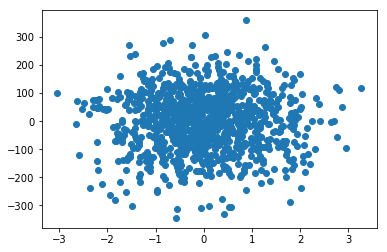

In [16]:
plt.scatter(X[:,0],y)

In [17]:
X.shape

(1000, 10)

In [18]:
from scipy.stats import uniform as sp_rand

In [19]:
params={'alpha':sp_rand()}
from sklearn.linear_model import Ridge

In [21]:
model=Ridge()
rsearch=RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100)
rsearch.fit(X,y)
print(rsearch)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f37607f0fa0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.9999998459970062
0.0020778931912704968


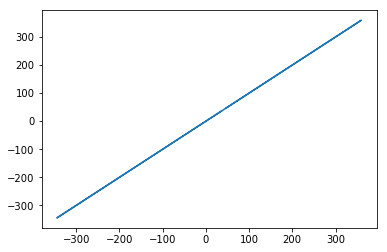

In [24]:
plt.plot(y,rsearch.predict(X))

# Hyperparameter Tuning + CrossValidation

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [30]:
X,y = skd.make_classification(n_samples=10000, n_features=2, n_redundant=0, random_state=4)

model=KNeighborsClassifier()

params={'n_neighbors':range(1,21,2), 'weights':['uniform','distance'], \
        'metric':['euclidian','manhattan','minkowski']}

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='f1', cv=cv)
grid_result=grid_search.fit(X,y)

print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')

Best 0.9060379833874848 using {'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'distance'}


In [31]:
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params_cv=grid_result.cv_results_['params']

In [32]:
for mean, stdev, param in zip(means,stds, params_cv):
    print(f'{mean} ({stdev}) with: {param}')

nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 1, 'weights': 'uniform'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 1, 'weights': 'distance'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 3, 'weights': 'uniform'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 3, 'weights': 'distance'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 5, 'weights': 'uniform'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 5, 'weights': 'distance'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 7, 'weights': 'uniform'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 7, 'weights': 'distance'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 9, 'weights': 'uniform'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 9, 'weights': 'distance'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 11, 'weights': 'uniform'}
nan (nan) with: {'metric': 'euclidian', 'n_neighbors': 11, 'weights': 'distance'}
nan (nan) with: {'metric': 'eucl

# Imbalanced Data

In [35]:
import sklearn

In [34]:
imblearn.__version__

'0.6.2'

In [48]:
from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Counter({0: 9900, 1: 100})


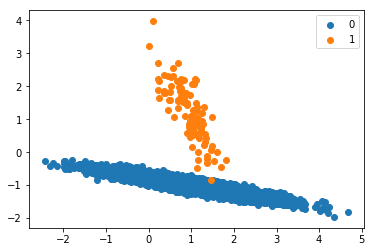

In [57]:
X,y=make_classification(n_samples=10000, n_features=2, n_redundant=0,\
                       n_clusters_per_class=1, weights=[0.99],\
                       flip_y=0, random_state=11)

counter=Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix=where(y==label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()

Counter({0: 9900, 1: 9900})


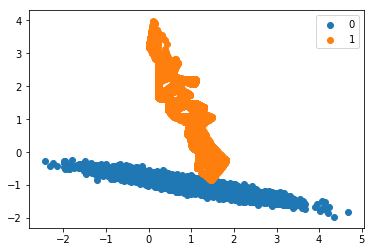

In [47]:
oversample=SMOTE()
X,y=oversample.fit_resample(X,y)
counter=Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix=where(y==label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()

Counter({0: 1980, 1: 990})


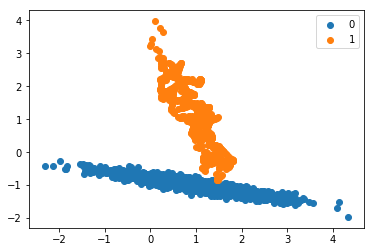

In [52]:
over=SMOTE(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)
X,y=pipeline.fit_resample(X,y)

counter=Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix=where(y==label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()

In [53]:
from imblearn.over_sampling import BorderlineSMOTE

Counter({0: 1980, 1: 990})


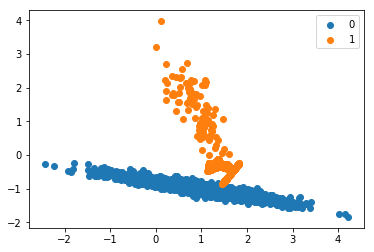

In [55]:
over=BorderlineSMOTE(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)
X,y=pipeline.fit_resample(X,y)

counter=Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix=where(y==label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()

In [56]:
from imblearn.over_sampling import ADASYN

Counter({0: 1980, 1: 990})


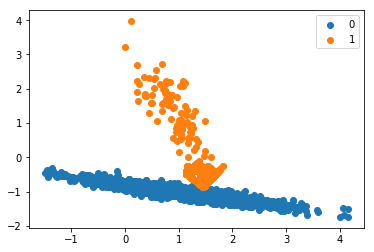

In [58]:
over=ADASYN(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)
X,y=pipeline.fit_resample(X,y)

counter=Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix=where(y==label)[0]
    plt.scatter(X[row_ix,0], X[row_ix,1], label=str(label))
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X,y = make_classification(n_samples=100000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], \
                         flip_y=0, random_state=42)

model=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(model, X,y, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall', np.mean(scores))

Mean recall 0.8499999999999999


In [65]:
Counter(y)

Counter({0: 99900, 1: 100})

In [66]:
over=ADASYN(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over),('u',under),('model',DecisionTreeClassifier())]
pipeline=Pipeline(steps=steps)

In [67]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(pipeline, X,y, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall', np.mean(scores))

/usr/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mean recall 0.94


In [68]:
over=BorderlineSMOTE(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over),('u',under),('model',DecisionTreeClassifier())]
pipeline=Pipeline(steps=steps)

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(pipeline, X,y, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall', np.mean(scores))

Mean recall 0.9266666666666665


In [69]:
over=SMOTE(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over),('u',under),('model',DecisionTreeClassifier())]
pipeline=Pipeline(steps=steps)

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(pipeline, X,y, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall', np.mean(scores))

Mean recall 0.9299999999999998


In [70]:
over=SMOTE(sampling_strategy=0.5)

steps=[('o',over),('model',DecisionTreeClassifier())]
pipeline=Pipeline(steps=steps)

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores=cross_val_score(pipeline, X,y, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall', np.mean(scores))

Mean recall 0.9299999999999998


In [72]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = RandomForestClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean recall: %.3f' % (k, score))

> k=1, Mean recall: 0.937
> k=2, Mean recall: 0.953
> k=3, Mean recall: 0.970
> k=4, Mean recall: 0.973
> k=5, Mean recall: 0.980
> k=6, Mean recall: 0.980
> k=7, Mean recall: 0.980


In [73]:
X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=1)

over=SMOTE(sampling_strategy=0.5)

steps=[('o',over)]
pipeline=Pipeline(steps=steps)
X,y=pipeline.fit_resample(X,y)

model=KNeighborsClassifier()

params={'n_neighbors':range(1,21,2), 'weights':['uniform','distance'], \
        'metric':['euclidian','manhattan','minkowski']}

cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='recall', cv=cv)
grid_result=grid_search.fit(X,y)

print(f'Best {grid_result.best_score_} using {grid_result.best_params_}')

Best 0.9981848515181848 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [74]:
import pickle

pickle.dump(grid_result, open('filename.sav','wb'))

In [76]:
X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=1)

In [77]:
loaded_model=pickle.load(open('filename.sav','rb'))
pred = loaded_model.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,pred)

array([[99899,     1],
       [    0,   100]])